In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pylab as plt


# load the data from internet
(train_image, train_labels), (test_image, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [2]:
type(train_image)

numpy.ndarray

In [3]:
train_image.shape

(60000, 28, 28)

In [4]:
test_image.shape

(10000, 28, 28)

In [5]:
np.unique(train_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [6]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
import random
random.seed(1)
train_idx = list(range(len(train_labels)))
sampler = random.sample(train_idx, 16)
sampler

[8805,
 37303,
 55537,
 52577,
 50054,
 4135,
 16716,
 7727,
 32468,
 49870,
 29457,
 30949,
 42702,
 24878,
 51689,
 13759]

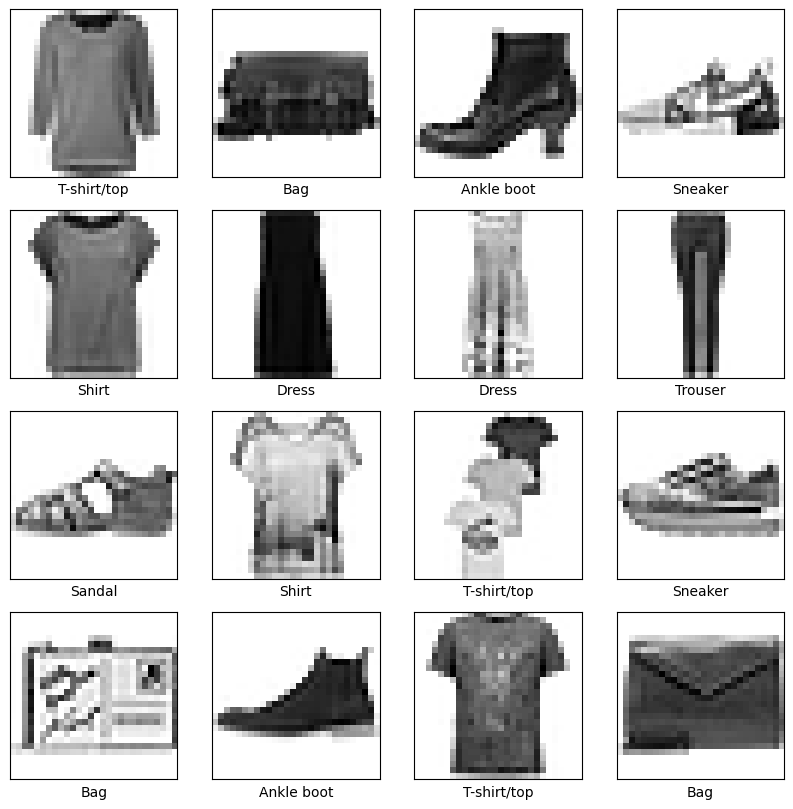

In [8]:

plt.figure(figsize=(10, 10))
for i in range(len(sampler)):
 plt.subplot(4,4,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(train_image[sampler[i]], cmap=plt.cm.binary)
 plt.xlabel(class_names[train_labels[sampler[i]]])
plt.show()


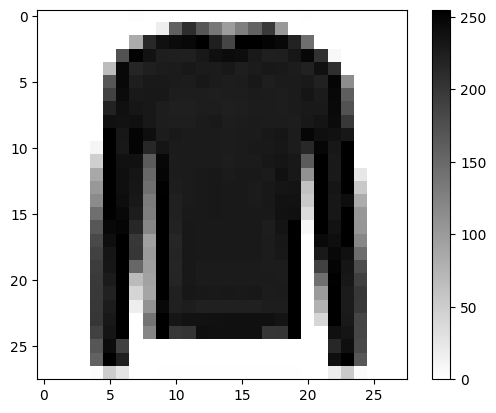

In [9]:
random_image_id = 15000
plt.figure()
plt.imshow(train_image[random_image_id],cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:

class_names[train_labels[random_image_id]]

'Pullover'

In [11]:
train_image[random_image_id]

array([[  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  17, 159, 210, 169,
        135,  98, 128, 156, 197, 102,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  84, 215, 239, 244, 247, 255,
        224, 186, 255, 255, 251, 246, 220, 145,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 172, 252, 236, 225, 224, 224, 230,
        240, 244, 242, 229, 224, 225, 233, 248, 205,   7,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  67, 246, 218, 224, 227, 228, 230, 228,
        228, 230, 225, 228, 231, 229, 227, 221, 238, 208,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 168, 246, 225, 229, 229, 228, 227, 230,
        228, 226, 227, 230, 225, 228, 228, 229, 221, 250, 114,   0,   0,
          0,   0],
       [  

In [12]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

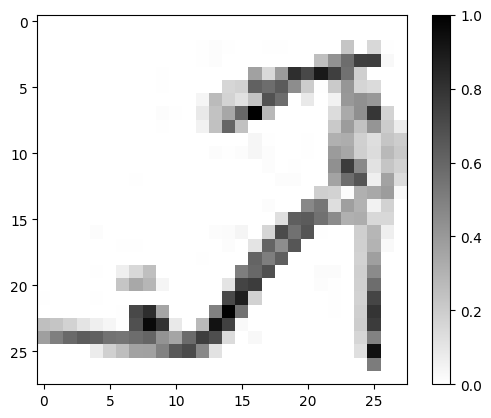

In [13]:
plt.figure()
plt.imshow(train_images[8], cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:

with tf.device('/GPU:1'):
#build
    model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),                           
      tf.keras.layers.Dense(128, activation='relu'), 
      tf.keras.layers.Dense(64, activation='relu'),                              
      tf.keras.layers.Dense(10),                             
      ])
    #compile
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    #train
    model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 3s 2ms/step - loss: 0.5169 - accuracy: 0.8180 - val_loss: 0.4214 - val_accuracy: 0.8473
Epoch 2/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3790 - accuracy: 0.8640 - val_loss: 0.3792 - val_accuracy: 0.8612
Epoch 3/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3382 - accuracy: 0.8762 - val_loss: 0.3710 - val_accuracy: 0.8568
Epoch 4/10
844/844 [==============================] - 2s 2ms/step - loss: 0.3148 - accuracy: 0.8834 - val_loss: 0.3462 - val_accuracy: 0.8745
Epoch 5/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2951 - accuracy: 0.8919 - val_loss: 0.3396 - val_accuracy: 0.8755
Epoch 6/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2798 - accuracy: 0.8953 - val_loss: 0.3441 - val_accuracy: 0.8720
Epoch 7/10
844/844 [==============================] - 2s 2ms/step - loss: 0.2708 - accuracy: 0.8997 - val_loss: 0.3543 - val_accuracy: 0.8693
Epoch 

In [15]:

# FashionMNIST
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

AttributeError: module 'pydot' has no attribute 'InvocationException'

313/313 [==============================] - 0s 888us/step


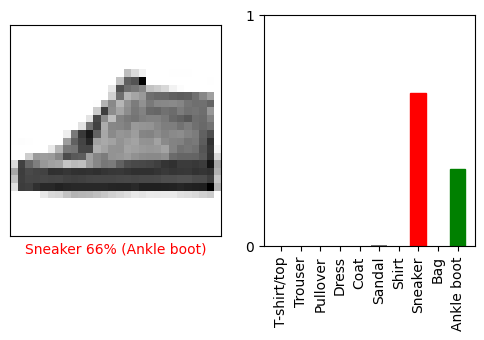

In [19]:
image_id = 107 # Pick an image id between 0 and 9999 inclusive

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel(f"{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})", color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks(range(10))
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(image_id, predictions[image_id], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(image_id, predictions[image_id],  test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)
plt.show()